Entrenamiento provedido en Español <br>
Training offered in English

<img src="https://www.ciesin.columbia.edu/images/logo_sm.png" >

# <font color="green">En Español. ANALYSIS DE PUNTOS CRITICOS DE VULNERABILIDAD - AmeriGEO 2023 San Jose</font>
# HOTSPOT VULNERABILITY ANALYSIS - AmeriGEO 2023 San Jose
JUAN F. MARTINEZ, Center for International Earth Science Information Network (CIESIN)<br><br>

### <font color="green">Comience a continuación: Instale las bibliotecas requeridas para este tutorial</font>
### Start Below: Install libraries required for this tutorial

In [ ]:
pip install geopandas rasterio matplotlib numpy pandas rasterstats scipy


<font color='green'>importar bibliotecas requeridas para este tutorial<br></font>
import libraries required for this tutorial

In [ ]:

from IPython.display import Image
from IPython.core.display import HTML
import geopandas as gpd
import rasterio
from rasterio import mask
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rasterstats import zonal_stats
from scipy.stats import boxcox



###  <font color="green"> La capacitación sobre vulnerabilidad de Hotspot proporcionará una capacitación integral en el marco, los datos y los métodos utilizados para desarrollar una evaluación de vulnerabilidad espacial. Este módulo de capacitación le enseña al usuario cómo identificar las áreas que se consideran más vulnerables dentro de un conjunto determinado de métricas o indicadores. <br> <br>La capacitación utilizará software y datos de acceso abierto para demostrar cómo desarrollar un producto final de análisis de puntos críticos utilizando diferentes fuentes y formatos de datos. La formación tendrá tres etapas: </font>
####  <font color="green"> 1. Marco teórico del enfoque de índice para el mapeo de vulnerabilidades de Hotspospot<br>  2. Procesamiento de Diferentes Productos de Datos: Estudio de Caso en Municipios del Cauca, Colombia<br> 3. Proceso de indexación y agregación
</font>

### The Hotspot vulnerability training will provide a comprehensive training in the framework, data, and methods used to develop a spatial vulnerability assessment. This training module  teaches the user how to identify areas that are considered the most vulnerable within a given set of metrics, or indicators. <br> <br>The training will utilize open-acccess software and data to demonstrate how to develop a final hotspot analysis product using different sources and formats of data. The training will take three stages:

#### 1. Theoretical Framework of the Index Approach to Hotspospot Vulnerability Mapping
#### 2. Processing of Different Data Products: Case Study in Municipalities of Cauca, Colombia
#### 3. Indexing and Aggregating Process <br>

# <font color="green"> 1. Marco teórico del enfoque de índice </font>
<font color="green">La Agenda de Desarrollo Sostenible 2030 de las Naciones Unidas nos ha proporcionado un modelo para la paz y la prosperidad de las personas y el planeta, ahora y en el futuro. <br>
Los 17 Objetivos de Desarrollo Sostenible (ODS) son los pilares principales de la Agenda que exigen una asociación global de todos los países miembros. <br><br>Este pmoduleroject toca varios ODS, más notablemente 1, 3, 6, 11 y 15.<br>
<img src="https://www.un.org/sustainabledevelopment/wp-content/uploads/sites/3/2015/01/S-SDG-Poster_-Letter.jpg" width="40%"><br>
La pobreza ha sido tradicionalmente medida por las dimensiones económicas individuales de ingreso y riqueza. Por ejemplo, la <a href="https://www.worldbank.org/en/understanding-poverty#:~:text=Regions%20are%20categorized%20using%20PIP%20definition.&text=Note%20on%20global%20poverty%20lines,%242.15%20per%20person%20per%20day." target="_blank">El Banco Mundial definió la línea de pobreza extrema global como un ingreso de $2,15 USD (2022)</a> o menos por día, que se basa en las líneas de pobreza nacionales de los 15 países más pobres del mundo. Sin embargo, estos indicadores no consideran en su totalidad otras formas de pobreza no financiera que pueden ser de igual importancia. <br>El concepto de pobreza multidimensional abarca una visión más holística porque intenta dar cuenta de las experiencias vividas por las personas y las múltiples privaciones que enfrentan en su vida diaria más allá de sus ingresos.<br> </font>
### <font color="green">Ejemplos de mapeo e índices de vulnerabilidad</font>
<font color="green">Existen varios enfoques para determinar la vulnerabilidad espacial que utilizan una combinación de datos de observación de la Tierra (EO) y modelos estadísticos, como árboles de decisión, aprendizaje automático e inteligencia artificial.</font>
##### <font color="green">1. Wang, X.; Sutton, PC; Qi, B. Mapeo global del PIB a 1 km2 utilizando imágenes satelitales nocturnas VIIRS. Internet de ISPRS J. Geo-Inf. 2019, 8, 580. https://doi.org/10.3390/ijgi8120580</font>
<font color="green"> Uso de imágenes satelitales y aprendizaje automático (SIML). Luces nocturnas (NTL), datos de población y aprendizaje automático de bosques de aislamiento no supervisado (iForest ML) para eliminar datos NTL irrelevantes para mapear el PIB en 1 km2 y producir coeficientes GINI nacionales. <br>
<img src="https://pub.mdpi-res.com/ijgi/ijgi-08-00580/article_deploy/html/images/ijgi-08-00580-g004.png?1577771172" width="40%"><br></font>
##### <font color="green">2. Mirza, M. U., Xu, C., Bavel, B. V., Van Nes, E. H. y Scheffer, M. (2021). Desigualdad global detectada remotamente. Actas de la Academia Nacional de Ciencias, 118(18), e1919913118. https://doi.org/10.1073/pnas.1919913118</font>
<font color="green">Calcula la densidad de NTL por persona en cada celda y caracteriza la desigualdad en la distribución entre conjuntos de celdas de cuadrícula calculando los coeficientes de Gini para cada conjunto. <br>
<img src="https://www.pnas.org/cms/10.1073/pnas.1919913118/asset/45c066f2-7e2f-4320-8f05-4474d24c4ca4/assets/images/large/pnas.1919913118fig04.jpg" width="40%"><br></font>
##### <font color="green">3. OFI (2018). Índice Global de Pobreza Multidimensional 2018: El panorama más detallado hasta la fecha de las personas más pobres del mundo. Informe. Iniciativa de Pobreza y Desarrollo Humano de Oxford, Universidad de Oxford. https://ophi.org.uk/multidimensional-poverty-index/ </font>
<font color="green">Método Alkire Foster: elige indicadores, aplica la línea de corte de “pobreza”, cuenta el número de carencias por persona, elige el número de corte de carencias para ser considerado “pobre”, cuenta el número de personas consideradas multidimensionalmente pobres. <br>
<img src="https://ophi.org.uk/wp-content/uploads/G-MPI_chart_with_weights_%C2%A9_web2-1024x737.png" width="40%"><br></font>
##### <font color="green"> 4. Chi, G., Fang, H., Chatterjee, S. y Blumenstock, J. E. (2022). Microestimaciones de riqueza para todos los países de bajos y medianos ingresos. Actas de la Academia Nacional de Ciencias, 119(3), e2113658119. https://doi.org/10.1073/pnas.2113658119 </font>
<font color="green">Índice de Riqueza Relativa (RWI): Combina encuestas de "verdad sobre el terreno" y SIML para entrenar un modelo que predice la pobreza.<br>
<img src="https://www.pnas.org/cms/10.1073/pnas.2113658119/asset/186bd4e7-bc76-426a-a71d-0b9606f1c614/assets/images/large/pnas.2113658119fig01.jpg" width=" 40%"></font>
##### <font color="green">5. Sherman, L., Proctor, J., Druckenmiller, H., Tapia, H. y Hsiang, S. (2023). Estimaciones globales de alta resolución del índice de desarrollo humano de las Naciones Unidas utilizando imágenes satelitales y aprendizaje automático (w31044; pág. w31044). Oficina Nacional de Investigación Económica. https://doi.org/10.3386/w31044</font>
<font color="green">Imágenes satelitales y aprendizaje automático (SIML) de imágenes satelitales diurnas/nocturnas y modelo de observación multitarea usando imágenes satelitales y fregaderos de cocina (MOSAIKS) que aprende la relación entre 32 fuentes de imágenes satelitales y un resultado deseado, un índice de desarrollo humano (IDH). ) para producir un resultado de HDI de mayor resolución.<br>
<img src="https://images.squarespace-cdn.com/content/v1/64090ac2649ae84371ef65cc/08fdc6f7-d9ac-4a68-9b84-68d0150ebd67/MOSAIKS_HDI_Highres.jpg" width="40%"></font>
##### <font color="green">6. Centro para la Red Internacional de Información de Ciencias de la Tierra - CIESIN - Universidad de Columbia. 2022. Índice de privación relativa global en cuadrícula (GRDI), versión 1. Palisades, Nueva York: Centro de aplicaciones y datos socioeconómicos de la NASA (SEDAC). https://doi.org/10.7927/3xxe-ap97</font>

<font color="green">Utiliza seis componentes indirectos del bienestar --índices de dependencia infantil, tasas de mortalidad infantil, grado de construcción del entorno, índice de desarrollo humano subnacional, Luces nocturnas 2020 y Tendencia de luces nocturnas (2012-2020)-- para generar un índice global de "privación" en Resolución de 30 segundos de arco.<br>
<img src="https://sedac.ciesin.columbia.edu/downloads/maps/povmap/povmap-grdi-v1/povmap-grdi-v1.jpg" width="40%"></font>
## <font color="green">Método de indexación y ponderación</font>
<font color="green"> El método de Análisis de Vulnerabilidad de Hotspots se tomó prestado de la <a href="https://www.ciesin.columbia.edu/documents/vmapping_guide.pdf">Guía paso a paso de CIESIN para el mapeo de puntos críticos de vulnerabilidad: Implementación del enfoque de índice espacial </a>. Este método desarrolla un modelo basado en datos que permite que diversas variables nominales, ya sean absolutas, físicas, sin unidades o índices, se transformen al mismo rango y se midan comparativamente. Cada componente que se introduce primero se transforma de un rango de 0 a 100, donde 0 representa el nivel más bajo y 100 representa el nivel más alto de vulnerabilidad. Todos los componentes introducidos se ponderan en función del nivel de importancia que le otorga el usuario. Los pesos de los componentes se pueden cambiar para ajustar el modelo. Los componentes ponderados se suman y se indexan nuevamente en un solo índice de vulnerabilidad de puntos críticos (HVI).
<br>

</font>


# 1. Theoretical Framework of the Index Approach
The United Nation's 2030 Sustainable Development Agenda has provided us a blueprint for peace and prosperity for people and the planet, now and into the future. <br>
The 17 Sustainable Development Goals (SDG's) are the main pillars of the Agenda that call for global partnership from all member countries. <br><br>This pmoduleroject touches on several SDGs, most notably 1, 3, 6, 11 and 15.<br>
<img src="https://www.undp.org/sites/g/files/zskgke326/files/migration/mm/sdg-sticker-eng.jpg" width="40%"><br>
Poverty has been traditionally measured by individual economic dimensions of income and wealth. For example, the <a href="https://www.worldbank.org/en/understanding-poverty#:~:text=Regions%20are%20categorized%20using%20PIP%20definition.&text=Note%20on%20global%20poverty%20lines,%242.15%20per%20person%20per%20day." target="_blank">World Bank defined the global extreme-poverty line as $2.15 USD (2022)</a> income or below per day, which is based on the national poverty lines of the world’s 15 poorest countries. However, these indicators do not entirely consider other non-financial forms of poverty that may be of equal importance. <br>The concept of multidimensional poverty encompasses a more holistic view because it attempts to account for the lived experiences of people and the multiple deprivations they face in their daily lives beyond their incomes.<br>

### Examples of Vulnerability Mapping and Indices
There are several apporaches to detemrming spatial vulnerability that use a mixture of Earth Observing (EO) data and statistical modeling such as decision trees, machine learning, and artificial intellience.
##### 1. Wang, X.; Sutton, P.C.; Qi, B. Global Mapping of GDP at 1 km2 Using VIIRS Nighttime Satellite Imagery. ISPRS Int. J. Geo-Inf. 2019, 8, 580. https://doi.org/10.3390/ijgi8120580
Using Satellite Imagery and Machine Learning (SIML). Nighttime Lights (NTL), population data, and unsupervised Isolation Forest Machine Learning (iForest ML) for removing irrelevant NTL data to map GDP at 1km2 and produce national GINI coefficients. <br>
<img src="https://pub.mdpi-res.com/ijgi/ijgi-08-00580/article_deploy/html/images/ijgi-08-00580-g004.png?1577771172" width="40%"><br>
##### 2. Mirza, M. U., Xu, C., Bavel, B. V., Van Nes, E. H., & Scheffer, M. (2021). Global inequality remotely sensed. Proceedings of the National Academy of Sciences, 118(18), e1919913118. https://doi.org/10.1073/pnas.1919913118
Calculates NTL density per person in each cell and characterize inequality in the distribution across sets of grid cells by computing Gini coefficients for each set. <br>
<img src="https://www.pnas.org/cms/10.1073/pnas.1919913118/asset/45c066f2-7e2f-4320-8f05-4474d24c4ca4/assets/images/large/pnas.1919913118fig04.jpg" width="40%"><br>
##### 3. OPHI (2018). Global Multidimensional Poverty Index 2018: The Most Detailed Picture to Date of the World’s Poorest People. Report. Oxford Poverty and Human Development Initiative, University of Oxford. https://ophi.org.uk/multidimensional-poverty-index/
Alkire Foster Method: Chooses indicators, applies cut-off “poverty” line, counts number of deprivations per person, chooses cut-off number of deprivations to be considered “poor”, counts number of people considered multidimensionally poor.  <br>
<img src="https://ophi.org.uk/wp-content/uploads/G-MPI_chart_with_weights_%C2%A9_web2-1024x737.png" width="40%"><br>
##### 4. Chi, G., Fang, H., Chatterjee, S., & Blumenstock, J. E. (2022). Microestimates of wealth for all low- and middle-income countries. Proceedings of the National Academy of Sciences, 119(3), e2113658119. https://doi.org/10.1073/pnas.2113658119
Relative Wealth Index (RWI): Combines “ground-truth” surveys and SIML to train model that predicts poverty.<br>
<img src="https://www.pnas.org/cms/10.1073/pnas.2113658119/asset/186bd4e7-bc76-426a-a71d-0b9606f1c614/assets/images/large/pnas.2113658119fig01.jpg" width="40%">
##### 5. Sherman, L., Proctor, J., Druckenmiller, H., Tapia, H., & Hsiang, S. (2023). Global High-Resolution Estimates of the United Nations Human Development Index Using Satellite Imagery and Machine-learning (w31044; p. w31044). National Bureau of Economic Research. https://doi.org/10.3386/w31044
Satellite Imagery and Machine Learning (SIML) of daytime/nighttime satellite imagery and Multi-task Observation using Satellite Imagery and Kitchen Sinks (MOSAIKS) model that learns the relationship between 32 sources of satellite imagery and a desired outcome, a Human Development Index (HDI) value, to produce a higher-resolution outcome of HDI.<br>
<img src="https://images.squarespace-cdn.com/content/v1/64090ac2649ae84371ef65cc/08fdc6f7-d9ac-4a68-9b84-68d0150ebd67/MOSAIKS_HDI_Highres.jpg" width="40%">
##### 6. Center for International Earth Science Information Network - CIESIN - Columbia University. 2022. Global Gridded Relative Deprivation Index (GRDI), Version 1. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/3xxe-ap97

Uses six proxy components of wellbeing --child dependency ratios, infant mortality rates, degree of built environment, subnational human development index, Nighttime lights 2020, and Nighttime lights trend (2012-2020)-- to generate a global "deprivation" index at 30 arcsecond resolution.<br>
<img src="https://sedac.ciesin.columbia.edu/downloads/maps/povmap/povmap-grdi-v1/povmap-grdi-v1.jpg" width="40%">

## Indexing and Weighting Method
The Hotspot Vulnerability Analysis method is borrowed from the <a href="https://www.ciesin.columbia.edu/documents/vmapping_guide.pdf">CIESIN Step-by-Step Guide to Vulnerability Hotspots Mapping: Implementing the Spatial Index Approach</a>. This method develops a data-driven model that allows for varied nominal variables --whether they are absolute, physical, unitless, or indexes-- to be transformed to the same range and be comparitively measured. Each component that is introduced is first transformed from a range from 0 to 100, where 0 represents the lowest and 100 represents the hightest levels of vulnerability. All of the components introduced are weighted based on the level of importance placed by the user. The weights of the components can be changed to adjust the model. The weighted componets are added together and indexed again into a single Hotspot Vulnerability Index (HVI).
<br>


# <font color="green">  2. Procesamiento de productos de datos:</font>
## <font color="green">Estudio de Caso de Municipios del Cauca, Colombia</font>

<font color="green">En esta lección, desarrollaremos un índice de vulnerabilidad de puntos críticos (HVI) para cada uno de los municipios del Cauca, Colombia, para medir tres componentes ambientales y uno socioeconómico para determinar qué municipios son los más vulnerables. Identificamos cuatro componentes del bienestar que queremos medir: <u>pobreza multidimensional, calor, agua y aire.</u><br><br></font>
- <font color="green">Pobreza Multidimensional: Medida por el Índice de Pobreza Multidimensional (IPM) del DANE.</font><br>
- <font color="green">Calor: medido por la temperatura máxima diurna de la superficie terrestre en Celsius (LST).</font><br>
- <font color="green">Agua: Medida por la evolución de la disponibilidad de agua terrestre (Agua).</font><br>
- <font color="green">Calidad del aire: medida por partículas finas a nivel del suelo de 2,5 micrómetros o menos en microgramos por metro cúbico (PM2,5).<br><br> </font>

### <font color="green"> Fuentes de datos:</font>
<font color="green"><a href="https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/#gsc.tab=0">Límites Municipales de Colombia</a> (Shapefile)<br><a href="https://geoportal.dane.gov.co/geovisores/sociedad/indicadores-regionales/">Índice de Pobreza Multidimensional del Valle del Cauca</a> (Table) <br><a href="https://sedac.ciesin.columbia.edu/data/set/sdei-global-summer-lst-2013/">Valle del Cauca Cuadrículas globales de temperatura de la superficie terrestre (LST) de verano, v1 (2013)</a> (Raster)<br> <a href="https://sedac.ciesin.columbia.edu/data/set/sdei-trends-freshwater-availability-grace/">Tendencias en la disponibilidad global de agua dulce del Experimento climático y de recuperación de la gravedad (GRACE), v1 (2002 – 2016)</a> (Raster)<br><a href="https://sedac.ciesin.columbia.edu/data/set/sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03/">Valle del Cauca Global (GL) Anual PM2.5 Cuadrículas de MODIS, MISR y SeaWiFS Aerosol Profundidad óptica (AOD), v4.03 (2019)</a> (Raster)</font>

# 2.  Processing Data Products:
## Case Study of Municipalities in Cauca, Colombia

In this lesson, we will develop a hotspot vulnerability index (HVI) for each of the municipalities in Cauca, Colombia to measure three environmental and one socieeconomic components to determine which municipalites are the most vulnerable.<br>
We identified four components of wellbeing that we want to measure: <u>multidimensional poverty, heat, water, and air.</u><br><br>
- Multidimensonal Poverty: Measured by the DANE Multidimensional Poverty Index (IPM).
- Heat: Measured by Land Surface Temperature daytime maximum in Celcius (LST).
- Water: Measured by trends in terrestrial water availability (Water).
- Air Quality: Measured by ground-level fine particulate matter of 2.5 micrometers or smaller in micrograms per cubic meter (PM2.5).

### Data Sources:
<a href="https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/#gsc.tab=0">Colombia Municipal Boundaries</a> (Shapefile)

<a href="https://geoportal.dane.gov.co/geovisores/sociedad/indicadores-regionales/">Valle del Cauca Multidimensional Poverty Index</a> (Table)

<a href="https://sedac.ciesin.columbia.edu/data/set/sdei-global-summer-lst-2013/">Valle del Cauca
Global Summer Land Surface Temperature (LST) Grids, v1 (2013)</a> (Raster)

<a href="https://sedac.ciesin.columbia.edu/data/set/sdei-trends-freshwater-availability-grace/">Trends in Global Freshwater Availability from the Gravity Recovery and Climate Experiment (GRACE), v1 (2002 – 2016)</a> (Raster)

<a href="https://sedac.ciesin.columbia.edu/data/set/sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03/">Valle del Cauca Global (GL) Annual PM2.5 Grids from MODIS, MISR and SeaWiFS Aerosol Optical Depth (AOD), v4.03 (2019)</a> (Raster)

####  <font color="green">Importar archivos --shapefile, tabla, y tres geoTiffs.</font>
<font color="green">Zonas utilizadas para delimitar zonas. Los valores de zona deben ser números enteros:<br><br></font>
#### Import files --shapefile, table, and three geoTiffs.
Zones used to delineate zones. Zone Values should be integers:

In [ ]:
#assing shapefile to zones
zones = gpd.read_file("/vsicurl/https://github.com/ciesin-geospatial/hotspot_training/raw/e9e2492f7c682422fe72c4328afe4dc36ba4871f/data/Col_CAUCA_municip.shp")
#vista previa de las primeras cinco filas
#preview first five rows
zones.head()

In [ ]:
#Importar tabla índice de pobreza multidimensional (IPM)
#Import multidimensional poverty index table (IPM)
IPM = pd.read_csv("https://github.com/ciesin-geospatial/hotspot_training/raw/e9e2492f7c682422fe72c4328afe4dc36ba4871f/data/cauca_IPM.csv", index_col=False, decimal=",")
IPM.head()


In [ ]:
#lista de columnas
#column list
IPM.columns

In [ ]:
#Ver los variables unicos en la columna 'clase'
#View the unique variables in column 'clase' (class)
IPM["clase"].unique()

In [ ]:
#tabla de subconjuntos para incluir solo filas con 'Total' en la columna 'clase'
#subset table to include only rows with 'Total' in the 'class' column
IPM  = IPM[IPM["clase"] == "Total"]
IPM.head()

In [ ]:
#seleccione solo las columnas de código municipal, nombre e IPM
#select only the columns for municipal code, name and IPM
IPM = IPM[["cod_municipio", "municipio", "ipm"]]

#cambiar el nombre de la columna del código municipal a 'MID'
#rename municipal code column to 'MID'
IPM = IPM.rename(columns={"cod_municipio": "MID"})
IPM.head()

In [ ]:
#archivos de datos utilizados para realizar estadísticas zonales
#files of data used to perform zonal statistics

#Temperatura de la superficie terrestre (LST)
#Land Surface Temperature (LST)
LST = rasterio.open("https://github.com/ciesin-geospatial/hotspot_training/raw/e9e2492f7c682422fe72c4328afe4dc36ba4871f/data/summer_LST.tif")
#disponibilidad de agua dulce (agua)
#freshwater availability (water)
water = rasterio.open("https://github.com/ciesin-geospatial/hotspot_training/raw/e9e2492f7c682422fe72c4328afe4dc36ba4871f/data/freshwater.tif")
#partículas de ozono 2.5 (PM25)
#ozone particulate matter 2.5 (PM25)
PM25 = rasterio.open("https://github.com/ciesin-geospatial/hotspot_training/raw/e9e2492f7c682422fe72c4328afe4dc36ba4871f/data/PM25.tif")

#leer banda 1 del ráster LST
#read LST raster band 1
LST_data = LST.read(1, masked=True)

#leer banda 1 del ráster water
#read water raster band 1
water_data = water.read(1, masked=True)

#leer banda 1 del ráster PM25
#read PM25 raster band 1
PM25_data = PM25.read(1, masked=True)



In [ ]:
#crea una gráfica con 1 fila y 4 columnas limitando el tamaño a 20 por 5
#create a plot with 1 row and 4 columns limiting size to 20 by 5
fig, ax = plt.subplots(1,4, figsize = (20,5))


#traza el archivo de forma de zonas en la primera columna llamada ax[0]
#plot the zones shapefile in the first column named ax[0]
zones.plot(cmap = 'rainbow', ax=ax[0])

#trazar rásteres en el resto de las columnas
#plot rasters in the rest of the columns
im1 = ax[1].imshow(LST_data, cmap='plasma')
im2 = ax[2].imshow(water_data, cmap='GnBu')
im3 = ax[3].imshow(PM25_data, cmap='viridis')

#establecer títulos para gráficos
#set titles for graphs
ax[0].set_title('Cauca - Municipalidades', wrap=True)
ax[1].set_title('Cauca - Temperatura de la\nsuperficie terrestre de verano', wrap=True);
ax[2].set_title('Cauca - Disponibilidad de\nagua dulce', wrap=True);
ax[3].set_title('Cauca - Material particulado 2.5\n(PM2.5)', wrap=True);

#barra de colores para rásteres
#color bar for rasters
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.colorbar(im3, ax=ax[3])

plt.show()

#####  <font color="green">Ejemplo de una municipalidad:</font>
##### Example of one Municipality:

In [ ]:
#recorra IDs de zona (MID)
#loop through zone IDs (MID)
for i in zones['MID'][:1]:
    #Printear MID
    #Print MID
    print("MID:", i)

    #obtener forma única de shapefile
    #get single shape from shapefile
    roi = zones[zones.MID == i]


    #enmáscarar los rásteres y establezca nodata en -9999
    #mask rasters and set nodata to -9999
    LST_arr, LSTbound = mask.mask(LST, roi["geometry"], crop=True, all_touched=True, nodata=-9999)
    water_arr, waterbound = mask.mask(water, roi["geometry"], crop=True, all_touched=True, nodata=-9999)
    PM25_arr, PM25bound = mask.mask(PM25, roi["geometry"], crop=True, all_touched=True, nodata=-9999)

    #establezca nodata (-9999) a None
    #Set nodata value (-9999) to None
    LST_arr[LST_arr ==-9999] = None
    water_arr[water_arr ==-9999] = None
    PM25_arr[PM25_arr ==-9999] = None

#trazar el gráfico
#plot the arrays
show(LST_arr)
show(water_arr)
show(PM25_arr)

#### <font color="green">Recorra todos los municipios:</font>
#### Loop through all municipalities:

In [ ]:
#Crear marco de datos en blanco para almacenar estadísticas zonales
#Create blank dataframe to store zonal statistics
df = pd.DataFrame(columns =['MID','LST','water','PM25'])

#recorra IDs de zona (MID)
#loop through zone IDs (MID)
for i in zones['MID']:

    #obtener fila de municipio único de shapefile
    #get single municipality row from shapefile
    roi = zones[zones.MID == i]

    #enmáscarar los rásteres y establezca nodata en -9999
    #Mask rasters with single municipality geometry and set nodata to -9999
    LST_arr, LSTbound = mask.mask(LST, roi["geometry"], crop=True, all_touched=True, nodata=-9999)
    water_arr, waterbound = mask.mask(water, roi["geometry"], crop=True, all_touched=True, nodata=-9999)
    PM25_arr, PM25bound = mask.mask(PM25, roi["geometry"], crop=True, all_touched=True, nodata=-9999)

    #establezca nodata (-9999) a None
    #Set nodata value (-9999) to None
    LST_arr[LST_arr ==-9999] = None
    water_arr[water_arr ==-9999] = None
    PM25_arr[PM25_arr ==-9999] = None

    #crear fila para agregar datos de fila al marco de datos
    #create row to append row data to dataframe
    row_to_append = pd.DataFrame([{'MID':i, 'LST': np.nanmean(LST_arr),
                                   'water':np.nanmean(water_arr),
                                   'PM25': np.nanmean(PM25_arr)}])
    #agregar datos de fila al marco de datos
    #append row data and dataframe
    df = pd.concat([df,row_to_append])
df.head()



In [ ]:
#combinar table IPM con table df
#comine IPM and df tables
df = pd.merge(IPM,df, on="MID", how="left")
df.head()

In [ ]:
#histogramas
#histograms
df.hist()

In [ ]:
#prueba transformaciones
#test out transformations
test = np.power(df['water'], 1.25)


# test = boxcox(df['PM25'], lmbda=None)[0]
# test = pd.DataFrame(list(test))
test.hist()


In [ ]:
#transformar columnas
#transform columns
df["water"]= np.power(df['water'], 1.25)
df["PM25"]= boxcox(df['PM25'], lmbda=None)[0]
df.hist()

# <font color='green'> 3. Proceso de indexación y ponderación</font>
<font color="green">Una vez calculados los valores promedio de cada componente para cada municipio, se indexa cada componente de 0 a 100.
<br><b>Cuando los valores bajos indican privación baja (IPM, LST y PM 2.5):</b><br>
Índice = ( Valor - Mínimo_de_conjunto ) / ( Máximo_de_conjunto - Mínimo_de_conjunto ) * 100
<br>
<br>
<b>Los valores altos indican una privación baja (disponibilidad de agua): </b><br>
Índice = ( Valor - Máximo_de_conjunto ) / ( Mínimo_de_conjunto - Máximo_de_conjunto ) * 100 </font>

# 3. Indexing and Weighting Process
Once the average values for each component are calculated for each municipality, each compoent is indexed from 0 to 100.
<br><b>When Low values indicates low deprivation (IPM, LST, and PM 2.5):</b><br>
Index =  ( Value - Minimum_of_Set ) / ( Maximum_of_Set - Minimum_of_Set ) * 100
<br>
<br>
<b>High values indicates low deprivation (Water availability): </b><br>
Index =  ( Value - Maximum_of_Set ) / ( Minimum_of_Set - Maximum_of_Set ) * 100


In [ ]:
df['ipm_index'] = (df['ipm']-df['ipm'].min())/(df['ipm'].max()- df['ipm'].min())*100
df['LST_index'] = (df['LST']-df['LST'].min())/(df['LST'].max()- df['LST'].min())*100
df['water_index'] = (df['water']-df['water'].max())/(df['water'].min()- df['water'].max())*100
df['PM25_index'] = (df['PM25']-df['PM25'].min())/(df['PM25'].max()- df['PM25'].min())*100
df.head()


<font color='green'>Los valores ponderados para cada municipio se pueden calcular en función de los datos de entrada. En este caso, asumimos la misma importancia para cada componente (0,25) y lo dividimos por el número de componentes (4).</font>

#### <font color="green"><b>HVI_ponderado = (imp * 0,25 + LST * 0,25 + agua * 0,25 + PM25 * 0,25) / 4</b></font>

Weighted values for each municipality can be calculated based on input data. In this case, we assume equal importance to each component (0.25) and divide by number of components (4).

#### <b>HVI_weighted = (imp * 0.25 + LST * 0.25 + water * 0.25 + PM25 * 0.25 ) / 4</b>


In [ ]:
df['HVI_weighted']= (df['ipm_index']* 0.25 + df['LST_index']* 0.25 + df['water_index']*0.25 + df['PM25_index']*0.25)/4
df.head()

<font color='green'>Indexación final realizada en municipio a partir de los valores ponderados (W):<br>
<b> HVI = (HVI_ponderad - Mínimo_de_conjunto ) / ( Máximo_de_conjunto - Mínimo_de_conjunto ) * 100</b></font> <br> <br>

Final Indexing performed on municipality from the weighted values (W):<br>
<b>HVI =  ( HVI_weighted- Minimum_of_Set ) / ( Maximum_of_Set - Minmum_of_Set ) * 100</b>


In [ ]:
df['HVI'] = (df['HVI_weighted']-df['HVI_weighted'].min())/(df['HVI_weighted'].max()- df['HVI_weighted'].min())*100
df

In [ ]:
#Histograma del índice de vulnerabilidad
#Histogram of Hotspot Vulnerability Index
df["HVI"].hist()
plt.title('Cauca - Indice de vulnerabilidad')
plt.show()

array([[<Axes: xlabel='ipm', ylabel='ipm'>,
        <Axes: xlabel='LST', ylabel='ipm'>,
        <Axes: xlabel='water', ylabel='ipm'>,
        <Axes: xlabel='PM25', ylabel='ipm'>,
        <Axes: xlabel='HVI', ylabel='ipm'>],
       [<Axes: xlabel='ipm', ylabel='LST'>,
        <Axes: xlabel='LST', ylabel='LST'>,
        <Axes: xlabel='water', ylabel='LST'>,
        <Axes: xlabel='PM25', ylabel='LST'>,
        <Axes: xlabel='HVI', ylabel='LST'>],
       [<Axes: xlabel='ipm', ylabel='water'>,
        <Axes: xlabel='LST', ylabel='water'>,
        <Axes: xlabel='water', ylabel='water'>,
        <Axes: xlabel='PM25', ylabel='water'>,
        <Axes: xlabel='HVI', ylabel='water'>],
       [<Axes: xlabel='ipm', ylabel='PM25'>,
        <Axes: xlabel='LST', ylabel='PM25'>,
        <Axes: xlabel='water', ylabel='PM25'>,
        <Axes: xlabel='PM25', ylabel='PM25'>,
        <Axes: xlabel='HVI', ylabel='PM25'>],
       [<Axes: xlabel='ipm', ylabel='HVI'>,
        <Axes: xlabel='LST', ylabel='HVI'>,
 

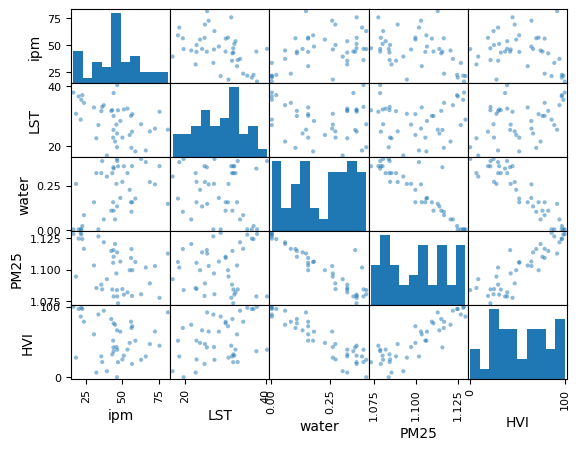

In [92]:
#matriz de diagrama de dispersión para las columnas elegidas
#scatterplot matrix for the selected columns
pd.plotting.scatter_matrix(df[['ipm', 'LST', 'water', 'PM25', 'HVI']], alpha=0.5)

In [ ]:
#fusionar el archivo de forma de zonas y el marco de datos
#merge zones shapefile and the dataframe
zones_m = zones.merge(df, on='MID')

In [ ]:
#crea una gráfica con 1 fila y 4 columnas limitando el tamaño a 20 por 5
#create a plot with 1 row and 4 columns limiting size to 20 by 5
fig, ax = plt.subplots(1,4, figsize = (20,5))

#traza el archivo de forma de zonas en la primera columna llamada ax[0]
#plot the zones shapefile in the first column named ax[0]
zones_m.plot(column='ipm_index', cmap='inferno', legend=True, ax=ax[0])
zones_m.plot(column='LST_index', cmap='inferno', legend=True, ax=ax[1])
zones_m.plot(column='water_index', cmap='inferno', legend=True, ax=ax[2])
zones_m.plot(column='PM25_index', cmap='inferno', legend=True, ax=ax[3])

#establecer títulos para gráficos
#set titles for graphs
ax[0].set_title('Cauca - Indice de Pobreza\nMultidimensional', wrap=True)
ax[1].set_title('Cauca - Temperatura de la\nsuperficie terrestre de verano', wrap=True);
ax[2].set_title('Cauca - Disponibilidad de\nagua dulce', wrap=True);
ax[3].set_title('Cauca - Material particulado 2.5\n(PM2.5)', wrap=True);




plt.show()

In [ ]:
#trazar el archivo de zonas con la rampa de color
#plot the zones shapefile with the HVI color ramp
zones_m.plot(column='HVI', cmap='inferno', legend=True)
plt.title('Cauca - Indice de Vulnerabilidad')
plt.show()

In [ ]:
#ordenar la tabla de archivos por orden descendente de vulnerabilidad
# #sort shapefile table by HVI descending order
zones_m = zones_m.sort_values('HVI', ascending=False)


In [ ]:
#elegir los 10 con mas alta vulnerabilidad
#select top 10 with highest vulnerability
top10 = zones_m.head(10)

In [ ]:
#Gráfico de barras de los diez municipios más vulnerables
#Bar graph of top ten most vulnerable municipalities
barplt= plt.bar('municipio', 'HVI', data=top10, color='orange')
plt.xticks(rotation=60, rotation_mode="anchor", ha='right')
plt.title('Municipalidades mas vulnerables en Cauca, Colombia')
plt.ylim(50, 105)
plt.bar_label(barplt, labels=list(round(top10['HVI'], 1)), label_type='edge')
plt.show()